# <p style="text-align: center;"> Aula Pratica 2
Nome: Francielly das Neves Lafaete </p>
Tema: Filtros Lineares e Convolução

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.color as skic
import skimage.filters as skif
import skimage.data as skid
import skimage.util as sku
from skimage import data, filters
from skimage.morphology import disk
from skimage.filters.rank import median
from ipywidgets import widgets
from scipy.ndimage import convolve
from skimage import io
%matplotlib inline

In [23]:
def show(img):
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    ax.imshow(img, cmap=plt.cm.gray)
    ax.set_axis_off()
    plt.show()
  


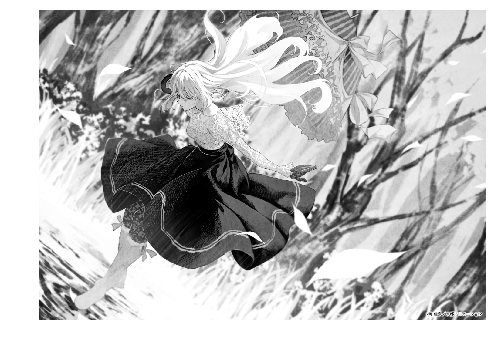

In [24]:
#imagem preto e branca escolhida
img = io.imread('violetpb.png', as_grey=True)  
show(img)

### Média

In [4]:
def Media(N):
    mean_kernel = np.ones((3, 3), dtype=float)
    mean_kernel /= mean_kernel.size
    mean_response = convolve(img, mean_kernel)
    show(mean_response)


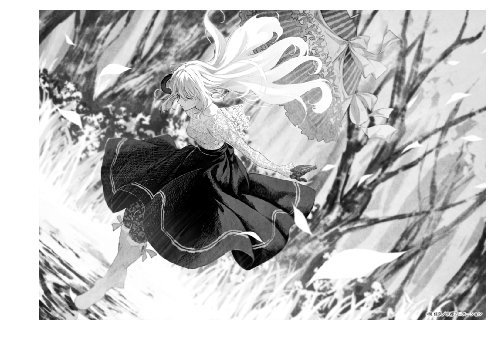

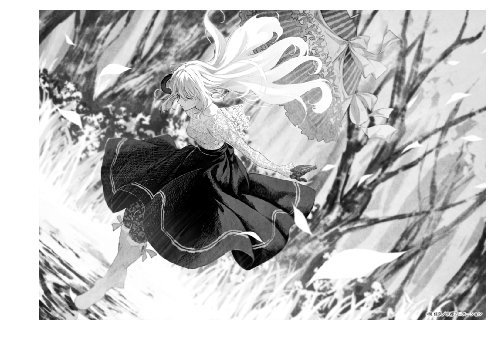

In [5]:

Media(3)
Media(5)


### Mediana

In [6]:
def Mediana(N):
    #med = median(img, disk(N))
    med = skif.rank.mean(img, skimage.morphology.square(N))
    show(med)

C:\Users\franc\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


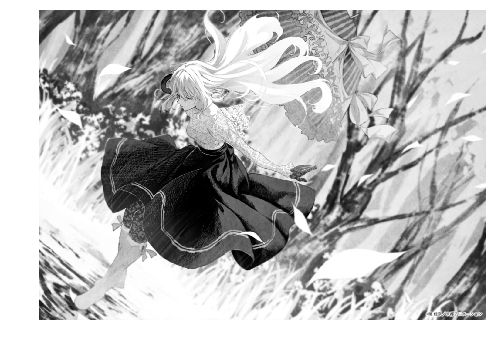

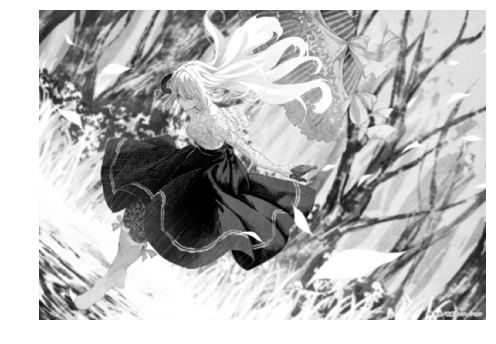

In [25]:
Mediana(3)
Mediana(7)

### Bordas Horizontais

In [8]:
def bordashorizontais(N):
    if N == 3:
        horizontal_edge_kernel = np.array([[ 0.05,  0.1,  0.05],
                                           [    0,    0,     0],
                                           [-0.05, -0.1, -0.05]])
        edge_response = convolve(img, horizontal_edge_kernel)
        show(edge_response)
        
    if N == 5:
        horizontal_edge_kernel = np.array([[ 0.5,  1,  2, 1,  0.5],
                                           [   0,  0,  0, 0,    0],
                                           [   0,  0,  0, 0,    0],
                                           [   0,  0,  0, 0,    0],
                                           [-0.5, -1, -2, -1, -0.5]])
        edge_response = convolve(img, horizontal_edge_kernel)
        show(edge_response)

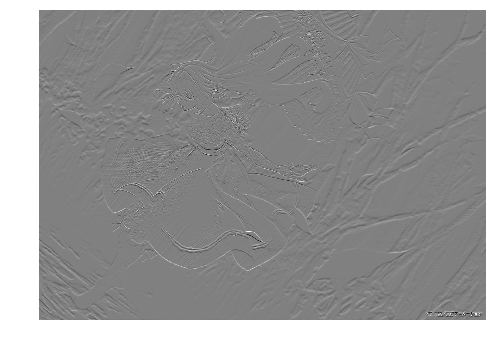

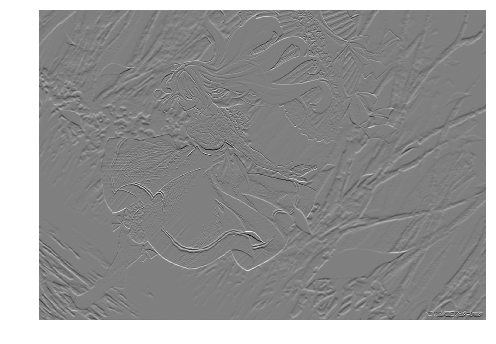

In [9]:
bordashorizontais(3)
bordashorizontais(5)

### Bordas Verticais

In [10]:
def bordasverticais(N):
    if N == 3:
        vertical_edge_kernel = np.array([[ -1,  0,  1],
                                         [ -2,  0,  2],
                                         [ -1,  0,  1]])
        edge_response = convolve(img, vertical_edge_kernel)
        show(edge_response)
    if N == 5:
        vertical_edge_kernel = np.array([[ 0.5,  0, 0, 0,  -0.5],
                                         [ 1,  0, 0, 0,  -1],
                                         [2, 0, 0, 0, -2],
                                         [1, 0, 0, 0, -1],
                                         [0.5,  0, 0, 0, -0.5]])
        edge_response = convolve(img, vertical_edge_kernel)
        show(edge_response)

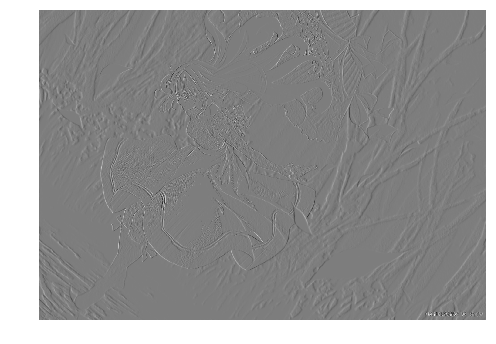

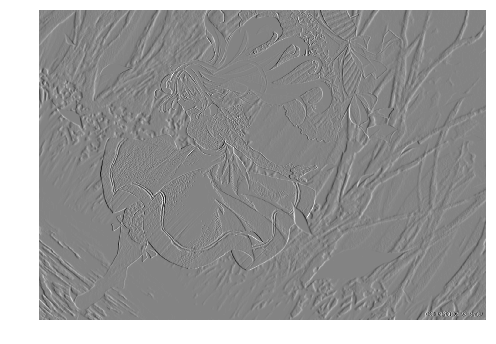

In [11]:
bordasverticais(3)
bordasverticais(5)

### Sobel

In [12]:
def sobel_filter(k_size):
    if k_size == 3:
        kh = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype = np.float)
        kv = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype = np.float)
    else:
        kh = np.array([[-1, -2, 0, 2, 1], 
                   [-4, -8, 0, 8, 4], 
                   [-6, -12, 0, 12, 6],
                   [-4, -8, 0, 8, 4],
                   [-1, -2, 0, 2, 1]], dtype = np.float)
        kv = np.array([[1, 4, 6, 4, 1], 
                   [2, 8, 12, 8, 2],
                   [0, 0, 0, 0, 0], 
                   [-2, -8, -12, -8, -2],
                   [-1, -4, -6, -4, -1]], dtype = np.float)

    gx = convolve(img, kh)
    gy = convolve(img, kv)

    g = np.sqrt(gx * gx + gy * gy)
    g *= 255.0 / np.max(g)

    
    show(g) 

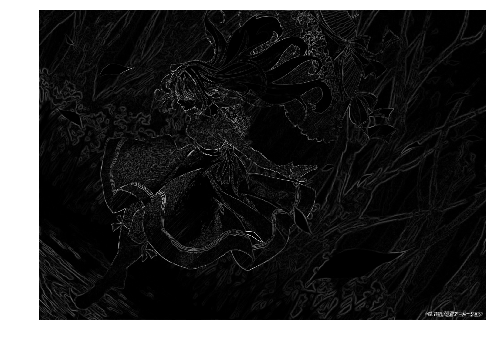

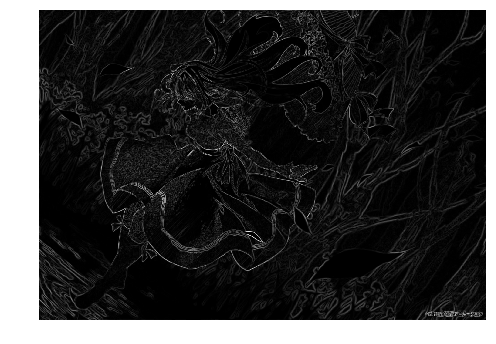

In [13]:
sobel_filter(3)
sobel_filter(5)


### Roberts

In [26]:
def roberts(k_size):
    if k_size == 2:
        kh = np.array([[1,0],
                       [0,-1]])
        kv = np.array([[0,1],
                       [-1,0]])       

    if k_size == 3:
        kh = np.array( [[ 0, 0, 0 ],
                        [ 0, 1, 0 ],
                        [ 0, 0,-1 ]] )

        kv = np.array( [[ 0, 0, 0 ],
                        [ 0, 0, 1 ],
                        [ 0,-1, 0 ]] )
            
    gx = convolve(img, kh)
    gy = convolve(img, kv)

    out = np.sqrt( np.square(gx) + np.square(gy))
    show(out)

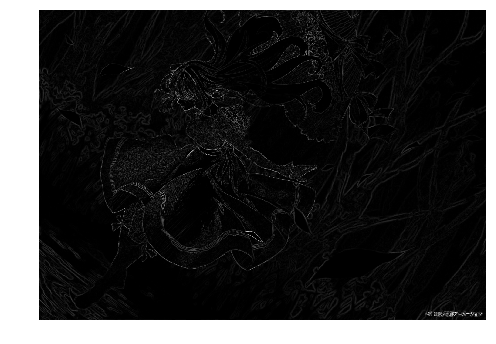

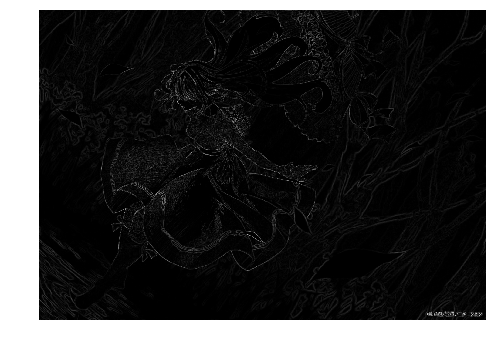

In [28]:
roberts(2)
roberts(3)

### Prewit

In [16]:
def prewit_filter(k_size):
    if k_size == 3:
        kh = np.array([[5, 5, 5], [-3, 0, 3], [-3, -3, -3]], dtype = np.float)
        kv = np.array([[5,-3,-3], [5, 0, -3], [5, -3, -3]], dtype = np.float)
    else:
        kh = np.array([[9, 9, 9, 9, 9], 
                       [9, 5, 5, 5, 9], 
                       [-7, -3, 0, -3, -7],
                       [-7, -3, -3, -3, -7],
                       [-7, -7, -7, -7, -7]], dtype = np.float)
        kv = np.array([[9, 9, -7, -7, -7], 
                       [9, 5, -3, -3, -7],
                       [9, 5, 0, -3, -7], 
                       [9, 5, -3, -3, -7],
                       [9, 9, -7, -7, -7]], dtype = np.float)

    gx = convolve(img, kh)
    gy = convolve(img, kv)

    g = np.sqrt(gx * gx + gy * gy)
    g *= 255.0 / np.max(g)

    
    show(g) 

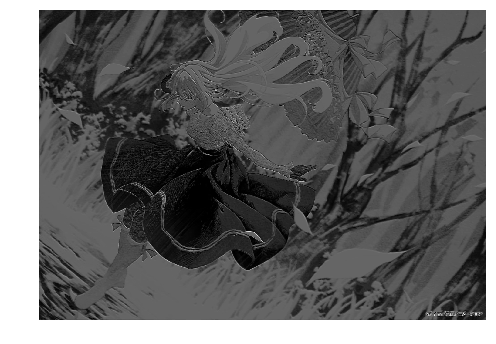

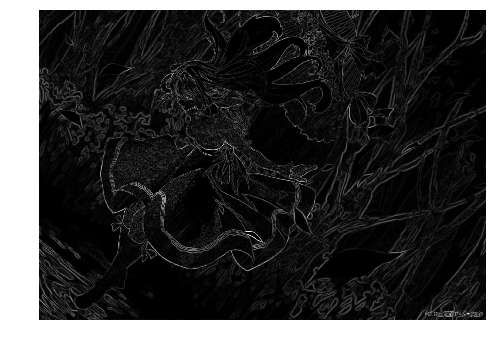

In [17]:
prewit_filter(3)
prewit_filter(5)

## o que mudou ao aumentar o tamanho do kernel?

Quanto maior o filtro, maior a intensidade de sua atuação,  comparando com o exemplo do Sobel, observamos bordas 
quando utlizamos o filtro 5x5, que nao estavao visiveis quando utlizamos o filtro 3x3

## Aplicando tres filtros diferentes na imagem

Aplicando ruido


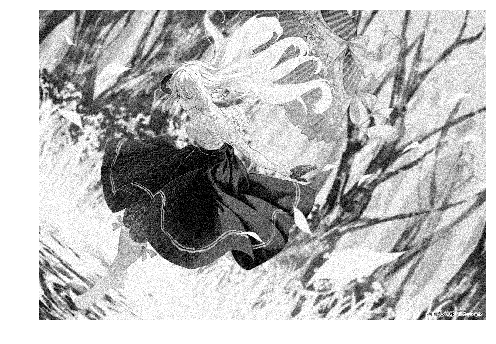

Ruido + filtro laplacian


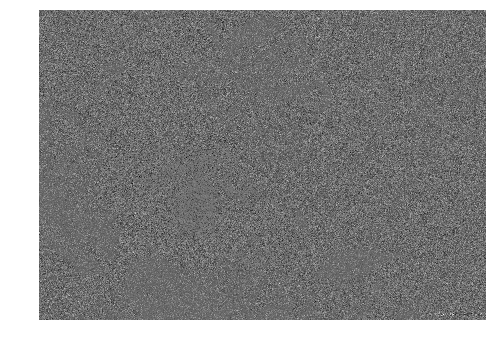

Ruido + filtro laplacian + gaussiano


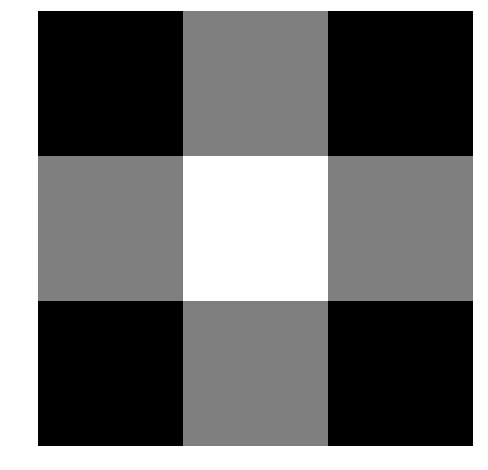

In [32]:
#filtro ruido
ruido = sku.random_noise(img)
print("Aplicando ruido")
show(ruido)

#filtro lapaciano
laplacian_filter=np.array([[0, 1, 0],
                           [1,-4, 1],
                           [0, 1, 0]])
laplacian = convolve(ruido, laplacian_filter)
print("Ruido + filtro laplacian")
show(laplacian)

#filtro gaussiano
print("Ruido + filtro laplacian + gaussiano")
filtered_img = skif.gaussian(laplacian_filter, sigma=7, multichannel=False, mode='constant', cval=0.0)
show(filtered_img)

## aplicando e removendo ruído de uma imagem RGB

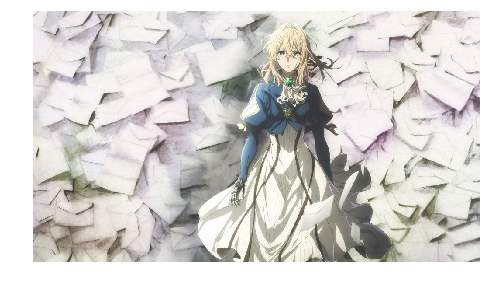

In [20]:
#imagem colorida escolhida
img2 = io.imread('violet.jpg', as_grey=False)  
show(img2)

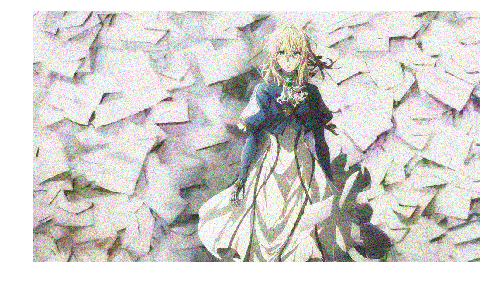

In [21]:
#adicionando ruido a imagem
ruido = sku.random_noise(img2)
show(ruido)


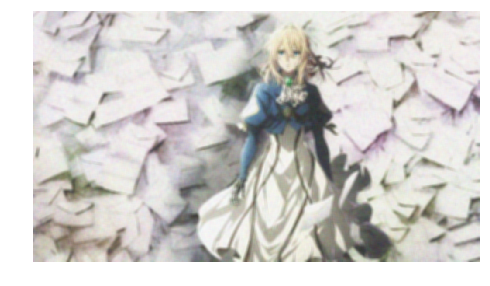

In [22]:
#removendo ruido da imagem aplicando a media
mean_kernel = np.ones((8, 8, 1), dtype=float)
mean_kernel /= mean_kernel.size
mean1 = convolve(ruido, mean_kernel)
show(mean1)
